# Ensaio de Machine Learning - Clusterização

## 0. Bibliotecas e _Helper Functions_

In [53]:
import warnings
import numpy  as np
import pandas as pd
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import pyplot as plt

In [12]:
def personal_settings():
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.float_format', lambda x:'%.2f' % x)
    warnings.filterwarnings('ignore')


def model_avaliation( model, data, labels): 
    ss = silhouette_score( data, labels )
    
    return pd.DataFrame( {'Model': model,
                         'Silhouette Score': ss}, index=[0] )

personal_settings()

## 1. Carregando Dados

In [3]:
X_train = pd.read_csv( 'data/X_dataset.csv', low_memory=False )
print( X_train.shape )
display( X_train.sample( 5 ) )

(178, 13)


,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
90,-1.14,0.22,-0.17,-0.30,-1.32,0.21,0.24,1.27,0.09,-1.15,0.49,0.37,0.14
171,-0.28,0.33,-0.32,0.00,-0.96,0.14,0.04,0.95,-1.67,2.09,0.07,0.13,0.14
93,-0.88,0.41,-0.54,-0.45,-0.82,0.51,0.40,-0.90,0.70,-1.26,0.54,0.74,0.01
25,0.06,0.26,3.12,1.65,1.70,0.57,0.49,0.87,0.58,-0.64,0.53,0.71,0.39
29,1.26,0.19,-0.57,-1.05,-0.26,0.58,0.42,-0.82,0.68,-0.15,0.46,0.85,0.54


## 2. Treinamento dos Algoritmos

### 2.1 Sem Alteração nos Parâmetros

#### K-Means

In [22]:
kmeans = KMeans( random_state=42 )

k_labels = kmeans.fit_predict( X_train )

kmeans_metric = model_avaliation( 'K-Means', X_train, k_labels )

#### Affinity Propagation

In [43]:
ap = AffinityPropagation( random_state=42 )

ap_labels = ap.fit_predict( X_train )

ap_metric = model_avaliation( 'Affinity Propagation', X_train, ap_labels )

#### Performance

In [24]:
initial_metrics = pd.concat( [kmeans_metric, ap_metric] )
display( initial_metrics.sort_values( by='Silhouette Score', ascending= False ) )

,Model,Silhouette Score
0,K-Means,0.19
0,Affinity Propagation,0.17


### 2.2 Buscando os Melhores Parâmetros

#### K-Means

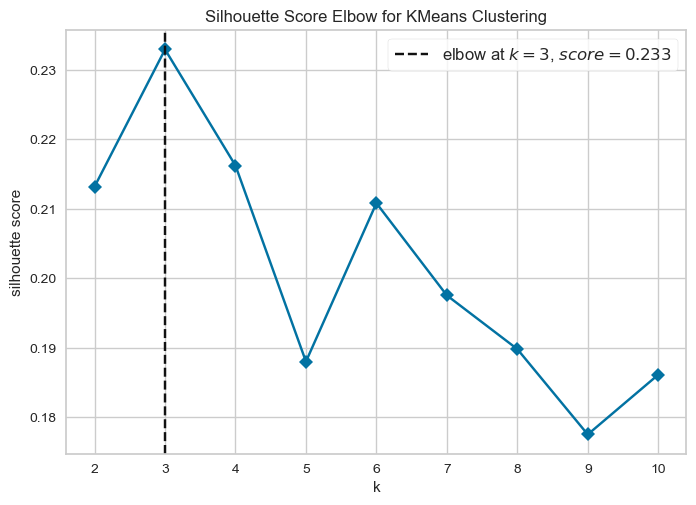

In [27]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

kmeans = KElbowVisualizer( KMeans( random_state=42 ), metric='silhouette', k=n_clusters, timings=False )
kmeans.fit( X_train )
kmeans.show();

#### Affinity Propagation

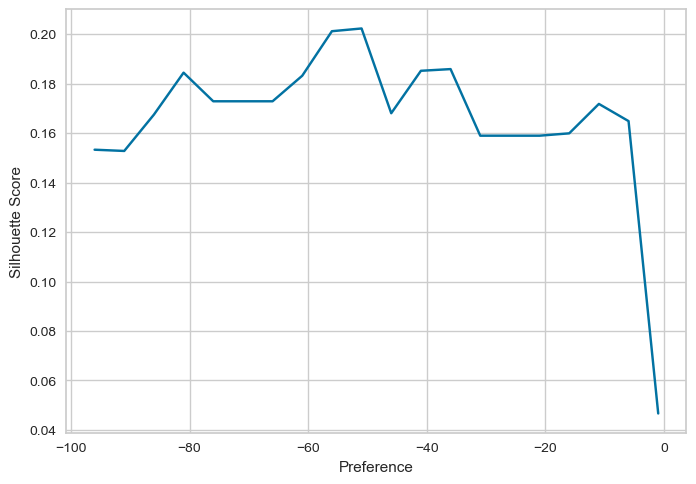

In [47]:
preferences = np.arange( -1, -100, -5 )
ss_list = list()

for i in range( len( preferences ) ):

    loop_model = AffinityPropagation( preference=preferences[i], random_state=42 )
    loop_labels = loop_model.fit_predict( X_train )

    loop_ss = silhouette_score( X_train, loop_labels )

    ss_list.append( loop_ss )

plt.plot( preferences, ss_list )
plt.xlabel( 'Preference' )
plt.ylabel( 'Silhouette Score' );

### 2.3 Modelos com os Melhores Parâmetros

#### K-Means

In [49]:
final_kmeans = KMeans( n_clusters=3, random_state=42 )

k_labels_final = final_kmeans.fit_predict( X_train )

kmeans_metric_final = model_avaliation( 'K-Means', X_train, k_labels_final )

#### Affinity Propagation

In [51]:
final_ap = AffinityPropagation( preference=-51, random_state=42 )

ap_labels_final = final_ap.fit_predict( X_train )

ap_metric_final = model_avaliation( 'Affinity Propagation', X_train, ap_labels_final )

#### Performance

In [52]:
final_metrics = pd.concat( [kmeans_metric_final, ap_metric_final] )
display( final_metrics.sort_values( by='Silhouette Score', ascending= False ) )

,Model,Silhouette Score
0,K-Means,0.23
0,Affinity Propagation,0.20
